<a href="https://colab.research.google.com/github/abhishekshenoy93/MachineLearning/blob/main/A_B_Testing_with_Chi_Squared_Test_to_Maximize_Conversions_and_CTRs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all Libraries 
import numpy as np 
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('ab_data.csv')

In [40]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [41]:
#Checking to see if any user in control saw new page and users in treatment that saw old page

df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [42]:
#Removing control/new_page and treatment/old_page

df_cleaned = df.loc[(df['group']== 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

In [43]:
df_cleaned.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [44]:
df_cleaned['user_id'].duplicated().sum()

1

In [45]:
df_cleaned[df_cleaned.duplicated(['user_id'], keep =False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [46]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [47]:
#keep first instance only 

df_cleaned = df.drop_duplicates(subset = 'user_id', keep = 'first')

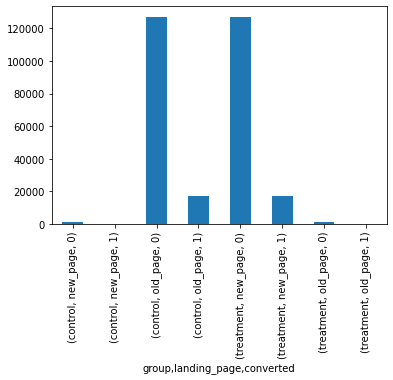

In [48]:
groups = df_cleaned.groupby(['group','landing_page','converted']).size()
groups.plot.bar()

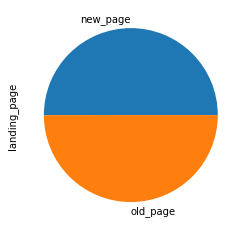

In [49]:
df_cleaned['landing_page'].value_counts().plot.pie()

In [50]:
#Rearrange the data into 2x2 for chi-sqaured 

#split the dataframes in two
a = df_cleaned[df_cleaned['group']== 'control']
b = df_cleaned[df_cleaned['group']== 'treatment']

#A-click,A-noclick,B-click,B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

T = np.array([[a_click,a_noclick], [b_click,b_noclick]])

In [51]:
#Chi Sqaured Test
from scipy import stats

print(scipy.stats.chi2_contingency(T,correction = False)[1])

0.22689933216132585


In [53]:
#Sanity Check 
a_CTR = a_click/(a_click+a_noclick)
b_CTR = b_click/(b_click+b_noclick)
print(a_CTR,b_CTR)


0.12029717968491792 0.11884253398646046
